# Finding the Energy Levels of a Particle in a Box
Here we will use Root Finding methods in order to solve the possible energy levels of the given transcendental functions.

Consider a particle in a square well potential where $V(x)=0$ for $x<|a|$ and $V(x)=V_0$ for $x<|a|$. Since when $V\rightarrow \infty$ we have a box, let us guess what the lowering of the walls does to the states. First of all, all the bound states (which alone we are interested in), will have $E\leq V_0$. Second, the wave functions of the low-lying levels will look like those of the particle in a box, with the obvious difference that $\psi$ will not vanish at the walls but instead spill out with an exponential tail. The eigenfunctions will still be even, odd, even, etc. First we will show that the even solutions have energies that satisfy the transcendental equation $k\tan(ka)=\kappa$, while the odd ones will have energies that satisfy $k\cot(ka)=-\kappa$, where $k$ and $\kappa$ are the real and complex wave numbers inside and outside the well, respectively. Note that $k$ and $\kappa$ are related by $k^2+\kappa^2=2mV_0/\hbar^2$. Verify that as $V_0$ tends to $\infty$, we regain the levels in the box. (2) Equations (5.2.23) and (5.2.24) [the two  transcendental equations above) must be solved numerically to obtain the bound state energies, hence we will solve these equations using a root bisection method to obtain all of the bound state energies. Let $a = 1 nm$, $V_0 = 20 eV$, and let the mass of the particle be $m = 511,000 eV/c^2$ It will also be useful to note that $\hbar c = 197 eV·nm$. You should end up with eight “even” energies and seven “odd” energies.

C:\Users\irbdr\AppData\Local\Temp/ipykernel_20716/1706987161.py:18: RuntimeWarning: invalid value encountered in true_divide
  return -k*1/np.tan(a*k)-kappa


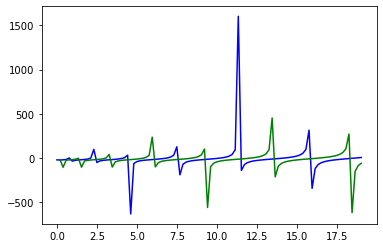

In [9]:
import numpy as np
from matplotlib import pyplot as plt
a=1 #nanometer
V0=20 #eV
m=511000 #eV/c^2
hc= 197 #eV * nm

#Define the Transcendental even functions
def func1(E):
    k= -np.sqrt(abs(2*m*E/hc**2))
    kappa= np.sqrt(2*m*(V0-E)/hc**2)
    return k*np.tan(a*k)-kappa

#Define the Trancendental Odd Functions
def func2(E):
    k=np.sqrt(2*m*E/hc**2)
    kappa=np.sqrt(2*m*(V0-E)/hc**2)
    return -k*1/np.tan(a*k)-kappa

#plot the function in order to make good guesses
Energies=np.linspace(0,19,100)
Even = func1(Energies)
Odd = func2(Energies)

#we expect to see an error here from the asymptotes, which is excactly what we get.
plt.plot(Energies, Even,'b')
plt.plot(Energies, Odd,'g')
plt.show()

In [10]:
#Root finding
for i in range(8):
    
    #Make a guess for the roots to create a range around the zero
    #Blue function
    Guessleft= float(input("Guess Left of zero : "))
    Guessright=float(input("Guess Right of zero : "))
    x1=Guessleft
    x2=Guessright
    
    error=1 #define dummy variable to track error
    accuracy = 10e-6 #Desire Accuracy of our function
    
    #This is for the first function (evens)
    if np.sign(func1(x1)) == np.sign(func1(x2)):
        print("Guess Again!"+str(func1(x1))+str(func1(x2)))
    else:
        while error>accuracy:
            xnew = .5 *(x1+x2)
            if np.sign(func1(xnew)) == np.sign(func1(x1)):
                x1 = xnew
            else:
                x2 = xnew
            error = abs(x1 -x2)
        x1 = .5*(x1+x2)
    print('Even Zero located at 'str(x1))

for j in range(7):
    #Make a guess for the roots to create a range around the zero
    #Green function
    Guessleft= float(input("Guess Left of zero : "))
    Guessright=float(input("Guess Right of zero : "))
    x1=Guessleft
    x2=Guessright
    
    error=1 #define dummy variable to track error
    accuracy = 10e-6 #Desire Accuracy of our function
    
    #This is for the second function (odds)
    if np.sign(func1(x1)) == np.sign(func1(x2)):
        print("Guess Again!"+str(func2(x1))+str(func2(x2)))
    else:
        while error>accuracy:
            xnew = .5 *(x1+x2)
            if np.sign(func1(xnew)) == np.sign(func1(x1)):
                x1 = xnew
            else:
                x2 = xnew
            error = abs(x1 -x2)
        x1 = .5*(x1+x2)
    print('Odd Zero located at 'str(x1))

Guess Left of zero : 12.5
Guess Right of zero : 15
14.309678077697754
Guess Left of zero : 8
Guess Right of zero : 10
Guess Again!-12.022980926751888-44.58197612779942
8.0


KeyboardInterrupt: Interrupted by user